#  CodSoft-----Machine Learning Internship

## Task 3: CUSTOMER CHURM PREDICTION

### In this task, I am  develop a model to predict customers churn for a subscription based on business.Here using models like Logisticregression,RandomForesets and Gradient boosting to predict churn.

# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data collection

In [2]:
data_dir = "bank-customer-churn-prediction"

In [3]:
os.listdir(data_dir)

['Churn_Modelling.csv']

In [4]:
csv_path_df = os.path.join(data_dir,"Churn_Modelling.csv")

In [5]:
df = pd.read_csv(csv_path_df)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
print(df.select_dtypes(include = ["number"]).columns)
print("="*90)
print("Total no.of int and float columns in dataset:",len(df.select_dtypes(include = ["number"]).columns))

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Total no.of int and float columns in dataset: 11


In [11]:
print(df.select_dtypes(include = ["object"]).columns)
print("="*90)
print("Total no.of int and float columns in dataset:",len(df.select_dtypes(include = ["object"]).columns))

Index(['Surname', 'Geography', 'Gender'], dtype='object')
Total no.of int and float columns in dataset: 3


### Checking wheather same columns repeated multiple time in dataset

In [12]:
df.duplicated().sum()

0

### Eliminating irrelavent columns in dataset

In [13]:
df_new = df.drop(["RowNumber","CustomerId","Surname"], axis = 1)

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Data Exploration

In [15]:
df_new.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df_new.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

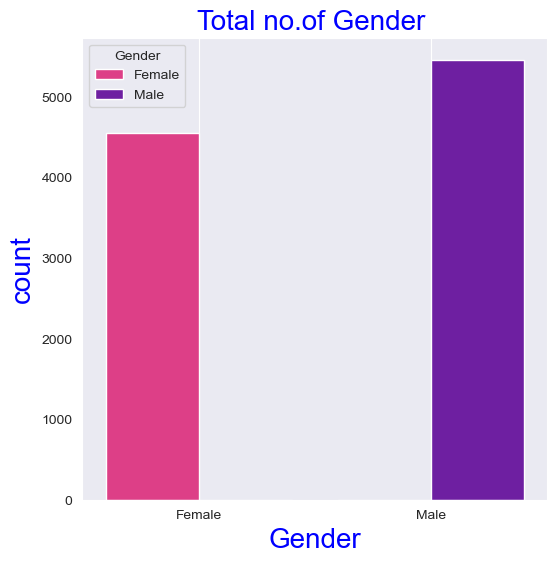

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize = (6,6))
sns.countplot(x = df.Gender , hue =df.Gender,  data =df , 
             # palette = "icefire"
             palette = {"Male":"#7209B7","Female":"#F72585"}
             )

plt.grid()
plt.title("Total no.of Gender ",fontsize=20, color = "b")
plt.ylabel("count",fontsize=20,color = "b")
plt.xlabel("Gender",fontsize=20,color = "b")
plt.show()

In [19]:
df_new.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

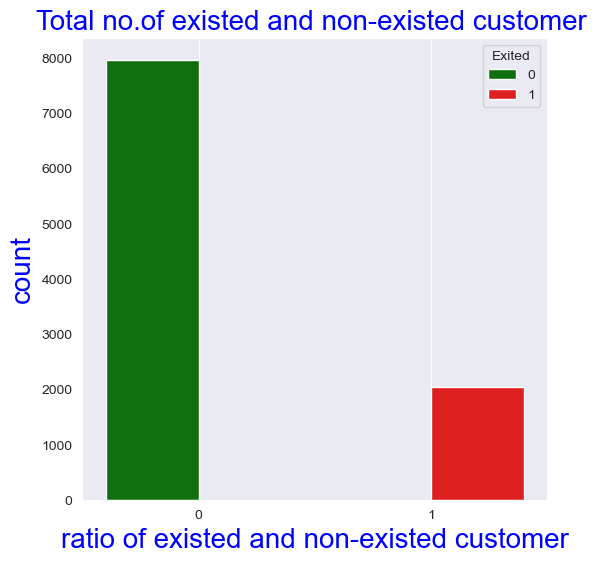

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize = (6,6))
sns.countplot(x = df.Exited , hue =df.Exited,  data =df_new , 
             # palette = "icefire"
             palette = {0:"g",1:"r"}
             )

plt.grid()
plt.title("Total no.of existed and non-existed customer ",fontsize=20, color = "b")
plt.ylabel("count",fontsize=20,color = "b")
plt.xlabel("ratio of existed and non-existed customer",fontsize=20,color = "b")
plt.show()

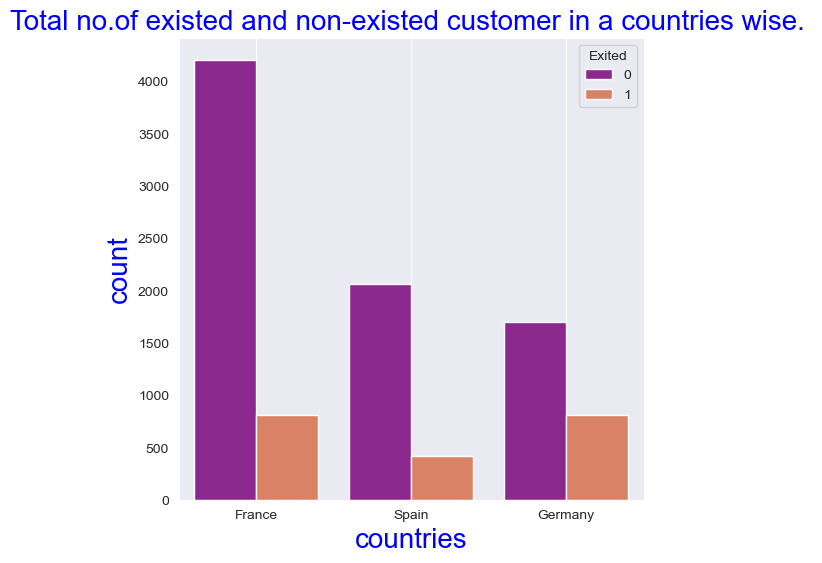

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize = (6,6))
sns.countplot(x = df.Geography ,  hue = df.Exited,  data =df_new , 
              palette = "plasma"
             #palette = {0:"g",1:"r"}
             )

plt.grid()
plt.title("Total no.of existed and non-existed customer in a countries wise. ",fontsize=20, color = "b")

plt.ylabel("count",fontsize=20,color = "b")
plt.xlabel("countries",fontsize=20,color = "b")
plt.show()

# Model preparation

In [22]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
X = df_new.drop(["Exited"] , axis = 1)

In [24]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [25]:
Y = df_new["Exited"]

In [26]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Encoding categorical columns

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder

LabelEncoder()

In [28]:
print(df_new.select_dtypes(include = ["object"]).columns)
print("="*90)
print("Total no.of int and float columns in dataset:",len(df_new.select_dtypes(include = ["object"]).columns))

Index(['Geography', 'Gender'], dtype='object')
Total no.of int and float columns in dataset: 2


In [29]:
X["Gender"] = X["Gender"].map({'Male':0 , 'Female':1})

In [30]:
X["Geography"] = encoder.fit_transform(X["Geography"])
print(X["Geography"])

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int32


In [31]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10


In [32]:
X.Gender.value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

# Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [34]:
X_scaler = scaler.fit_transform(X)

In [35]:
X_scaler

array([[-0.32622142, -0.90188624,  1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738,  1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624,  1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624,  1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057, -0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624,  1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

# correlation

In [36]:
plt.figure(figsize=(8,10))
X.corr().style.background_gradient(cmap='viridis')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,0.007888,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Geography,0.007888,1.000000,-0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369
Gender,0.002857,-0.004719,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112
Age,-0.003965,0.022812,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,0.003739,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.069408,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,0.003972,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.008523,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.006724,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.001369,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


<Figure size 800x1000 with 0 Axes>

In [37]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df_new["Gender"] = df_new["Gender"].map({'Male':0 , 'Female':1})

In [39]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df_new.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [41]:
df_new["Geography"] = df_new["Geography"].map({'France':0 , 'Germany':1,'Spain':2})

In [42]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [43]:
plt.figure(figsize=(8,10))
df_new.corr().style.background_gradient(cmap='viridis')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,-0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.002857,-0.004719,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Age,-0.003965,0.022812,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Figure size 800x1000 with 0 Axes>

In [44]:
corr_matrix = df_new.corr()

In [45]:
corr_matrix["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
Gender             0.106512
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_scaler,Y,test_size=0.2,random_state=2)

# Model Selection

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [48]:
model_1 = LogisticRegression()
model_2 = RandomForestClassifier(random_state=42,n_estimators=50)
model_3 = XGBClassifier()

In [49]:
model_1.fit(X_train,Y_train)

LogisticRegression()

In [50]:
model_2.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [51]:
model_3.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# LogisticRegression

In [52]:
x_train_accuracy_1 = model_1.predict(X_train)
x_test_accuracy_1 = model_1.predict(X_test)

training_data_accuracy_1 = accuracy_score(x_train_accuracy_1,Y_train)
testing_data_accuracy_1 = accuracy_score(x_test_accuracy_1,Y_test)

print('Training Accuracy : ', training_data_accuracy_1*100)
print('Testing  Accuracy : ', testing_data_accuracy_1*100)

Training Accuracy :  80.625
Testing  Accuracy :  81.35


In [53]:
print(f"\nClassification Report for Logistic Regression:\n{classification_report(Y_test, x_test_accuracy_1)}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1617
           1       0.55      0.14      0.23       383

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.56      2000
weighted avg       0.77      0.81      0.77      2000



## Confusion Matrix

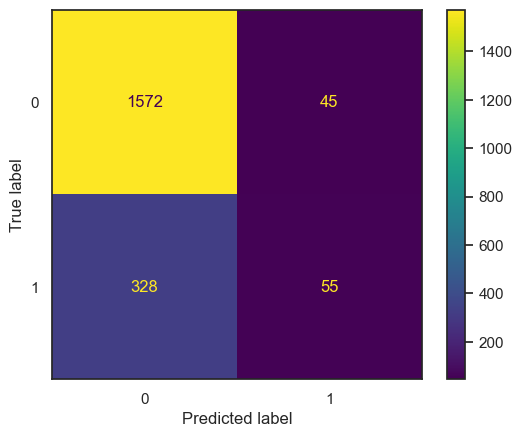

In [54]:
sns.set(style = "white")
ConfusionMatrixDisplay.from_estimator(model_1, X_test, Y_test , cmap = "viridis")

plt.show()

# RandomForestClassifier

In [55]:
x_train_accuracy_2 = model_2.predict(X_train)
x_test_accuracy_2 = model_2.predict(X_test)

training_data_accuracy_2 = accuracy_score(x_train_accuracy_2,Y_train)
testing_data_accuracy_2 = accuracy_score(x_test_accuracy_2,Y_test)

print('Training Accuracy : ', training_data_accuracy_2*100)
print('Testing  Accuracy : ', testing_data_accuracy_2*100)

Training Accuracy :  99.88749999999999
Testing  Accuracy :  86.15


In [56]:
print(f"\nClassification Report for RandomForestClassifier:\n{classification_report(Y_test, x_test_accuracy_2)}")


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1617
           1       0.75      0.42      0.53       383

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.85      2000



## Confusion matrix

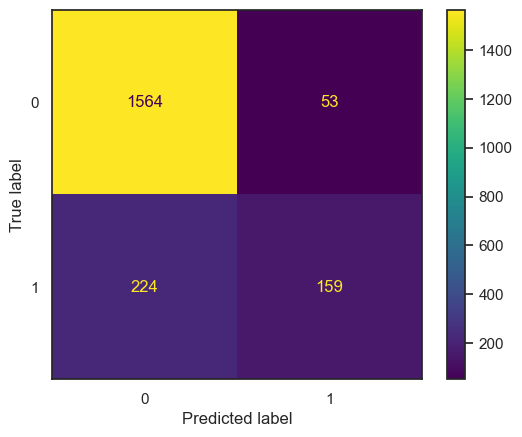

In [57]:
sns.set(style = "white")
ConfusionMatrixDisplay.from_estimator(model_2, X_test, Y_test , cmap = "viridis")

plt.show()

# XGBClassifier

In [58]:
x_train_accuracy_3 = model_3.predict(X_train)
x_test_accuracy_3 = model_3.predict(X_test)

training_data_accuracy_3 = accuracy_score(x_train_accuracy_3,Y_train)
testing_data_accuracy_3 = accuracy_score(x_test_accuracy_3,Y_test)

print('Training Accuracy : ', training_data_accuracy_3*100)
print('Testing  Accuracy : ', testing_data_accuracy_3*100)

Training Accuracy :  95.85000000000001
Testing  Accuracy :  84.55


In [59]:
print(f"\nClassification Report for RandomForestClassifier:\n{classification_report(Y_test, x_test_accuracy_3)}")


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1617
           1       0.66      0.41      0.50       383

    accuracy                           0.85      2000
   macro avg       0.76      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000



## Confusion Matrix

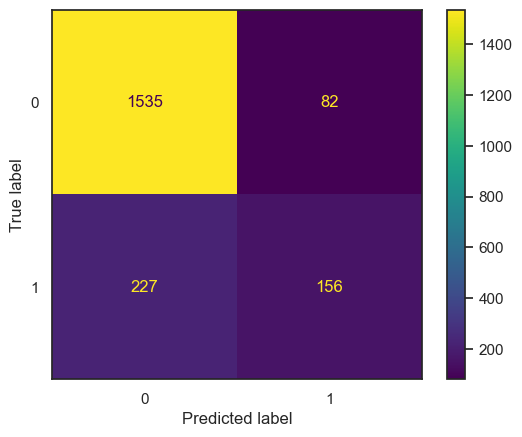

In [60]:
sns.set(style = "white")
ConfusionMatrixDisplay.from_estimator(model_3, X_test, Y_test , cmap = "viridis")

plt.show()

# Conclusion

* 1. Actually LogisticRegression() can't performaned effectively beacuse it can identify 328 customer utilizing subscription and 55 customers are cancel the subscription.
* 2. But RandomForestClassifier() and XGBClassifier() are performance efficiently moels can identify the 224 and 227 customer are utilizing the subscription and 159 and 156 customer are cancel the subscription.
* 3. However,as per given problem statement "156 or 159 customer are tring to cancel the subscription".